In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns

In [2]:
%config InlineBackend.figure_format = 'retina'

#### Bayesian Approaches to Statistics and Modeling

- Image we are trying to determine average IQ of students at the University of Michigan.
- Someone asks me, *Hey, what do you think the average IQ could be?*
- I look online, and see that the IQ test scores, for the U.S. population, are, by design, normally distributed with $\mu$=100, $\sigma$=10. I'll start out with that as an "educated guess", knowing that it may not be best belief for the mean but will be good place to start.

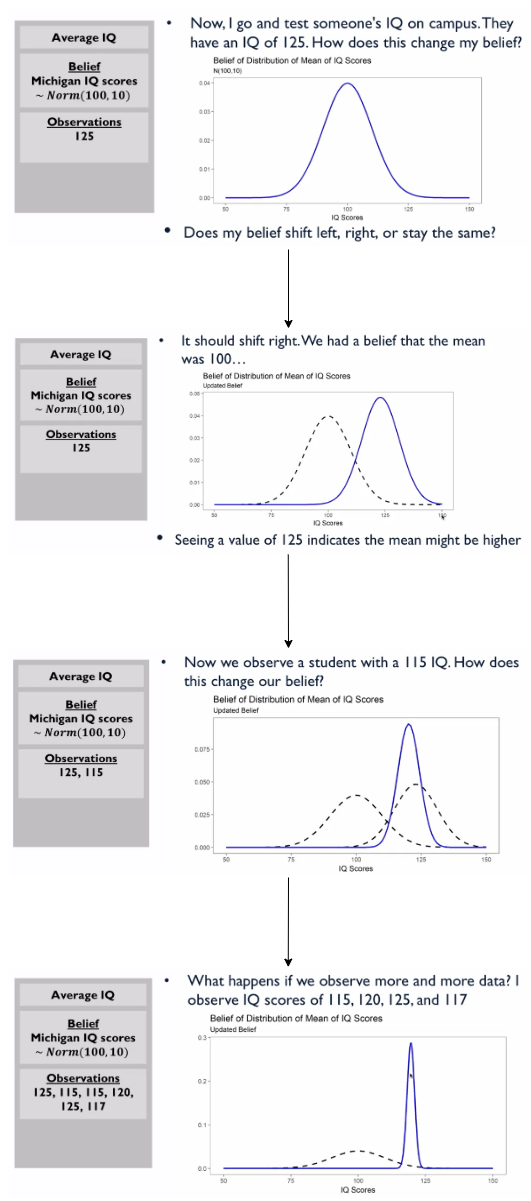

In [3]:
Image('images/bayesian_1.png')

- As you can see in the images above, the mean value changes with the observations added after selecting good place to start.
- Okey, so what happens if we observe more and more data?
- We can see that more and more data allows us to better focus in our belief about the mean of IQ scores at U of M.
- The process that we went through is called **Bayesian Updating**. This provides a distribution on the quantity of interest, called the **posterior**.
- The posterior allows us to update our beliefs and answer questions about the quantity of interest.

**!!!Caution**<br>
Imagine this is my data in a Bayesian setting. I don't believe that there's a single mu, I believe that there's an entire distribution of them, and we're going to try to infer what this distribution is using the data. In a frequentist analysis, this is a constant. We don't know, we try to estimate. In a Bayesian analysis, this is a belief that we keep updating with new data, and this is a very different way of thinking about the world.

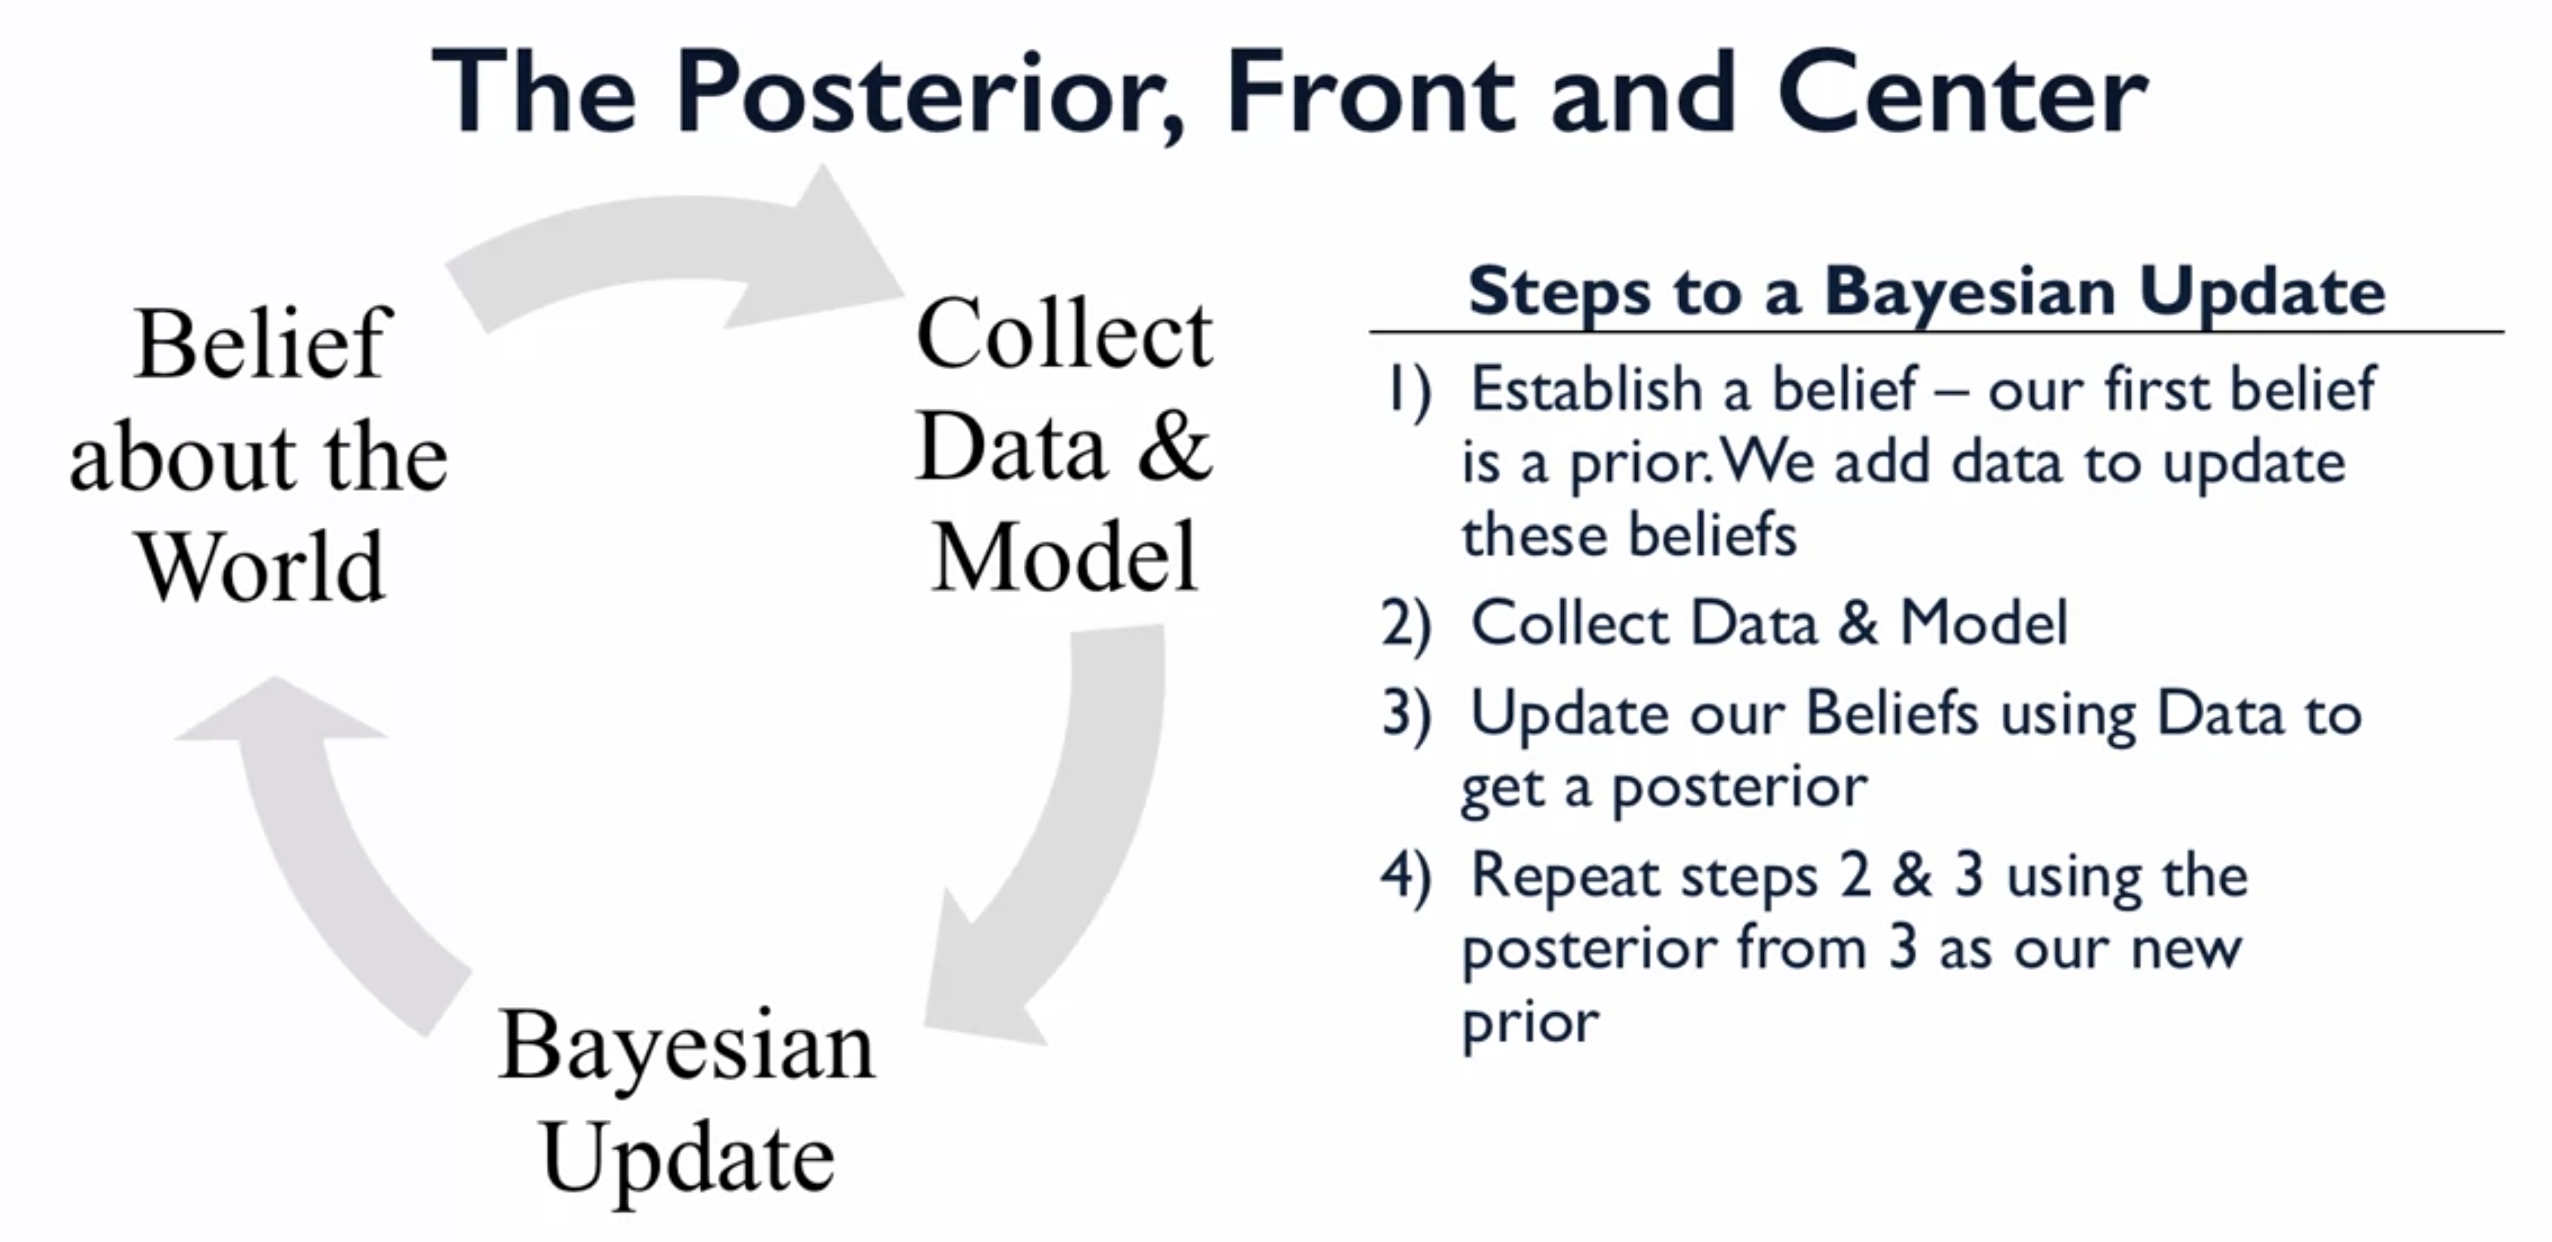

In [4]:
Image('images/bayesian_2.png', width=600)

#### Bayesian Approaches Case Study
- Question: Does a child's IQ have a relationship with the IQ of their mother?
- Data: National Longitudinal Survey of Youth. Source: Gelman and Hill (2007)
- 434 observations

|   | kid_score | mom_hs | mom_iq | mom_age |
|---|-----------|--------|--------|---------|
| 1 | 65        | 1      | 121    | 27      |
| 2 | 98        | 1      | 89     | 25      |
| 3 | 85        | 1      | 115    | 27      |
| 4 | 83        | 1      | 99     | 25      |
| 5 | 115       | 1      | 93     |         |

** mom_hs: went to high school or not?

##### The Model

- We'll use a linear model
- We'll start out with the most basic of linear regression models
- Regression form: \begin{equation*}ChildIQ = \beta_0 + \beta_1(momIQ) + \beta_2(momAge) \end{equation*}

- Up until now, we haven't done anything different than what we have done in past.
- The Bayesian framework, however, says that we have to specify prior distributions for our beliefs as well as likelihoods.
- **Key Point**: Every parameter must begin with a distribution that captures our beliefs. We call this **priors**.

- In Bayesian setting, we need priors on each of our parameters.
- $\beta_0$ ~ N(0, 20) I put a relatively weak prior on the intercept term to allow it to vary a lot if it needs to. The data will be centered and so this isn't a large concern
- $\beta_1$ ~ N(1, 5) I put a prior centered at one with a wide variance to account for the fact that I expect that a child's IQ is able to be predicted very well by a mother's IQ but I'm not certain.
- $\beta_2$ ~ N(0, 5) I put a prior centered at zero because I have no idea how age will affect IQ. The large variance accounts for my ignorance in what this value may be.
- Therefore, my first belief is that if the mother's IQ is 110, the child's IQ also is 110. Because I start with $\beta_0$ as 0, $\beta_1$ as 1 and $\beta_2$ as 0 in my first belief.
- Okay, my first belief is true? Probably not. So, I need to **general error**($\sigma_e$).<br>

$ChildIQ_i$ ~ $N(\beta_0 + \beta_1(momIQ_i) + \beta_2(momAge_i)$, $\sigma_e)$

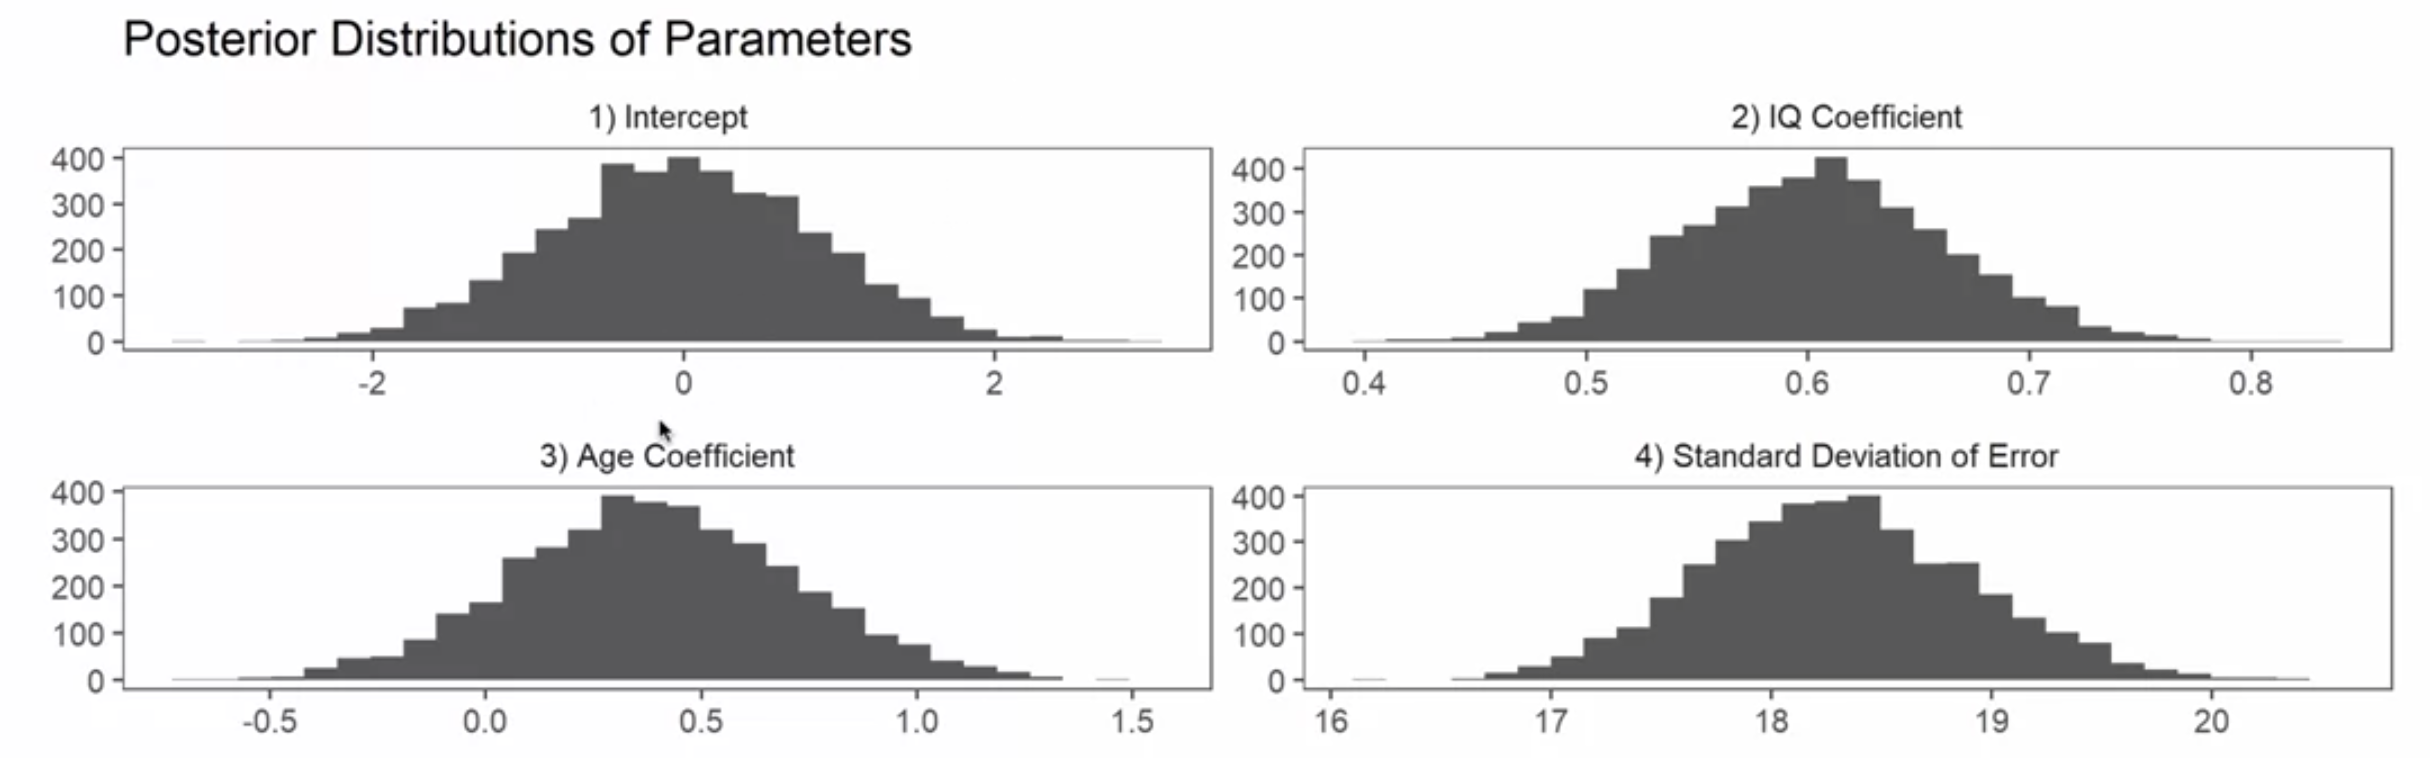

In [5]:
Image('images/bayesian_3.png', width=600)

You can see the coefficient distributions above. Unlike the frequentist approach, we can examine the coefficients of the parameters, not only distribution of values in the Bayesian approach.

At first glance, we can say that the mean of the coefficient for the IQ parameter is around 0.6 and also, zero is not available value for the coefficient for this parameter. But, when we looking at the distribution of the Age coefficient, we can say that zero is available value for this coefficient. The mean of this coefficient looks around 0.45 but we shouldn't forget the zero value is available.

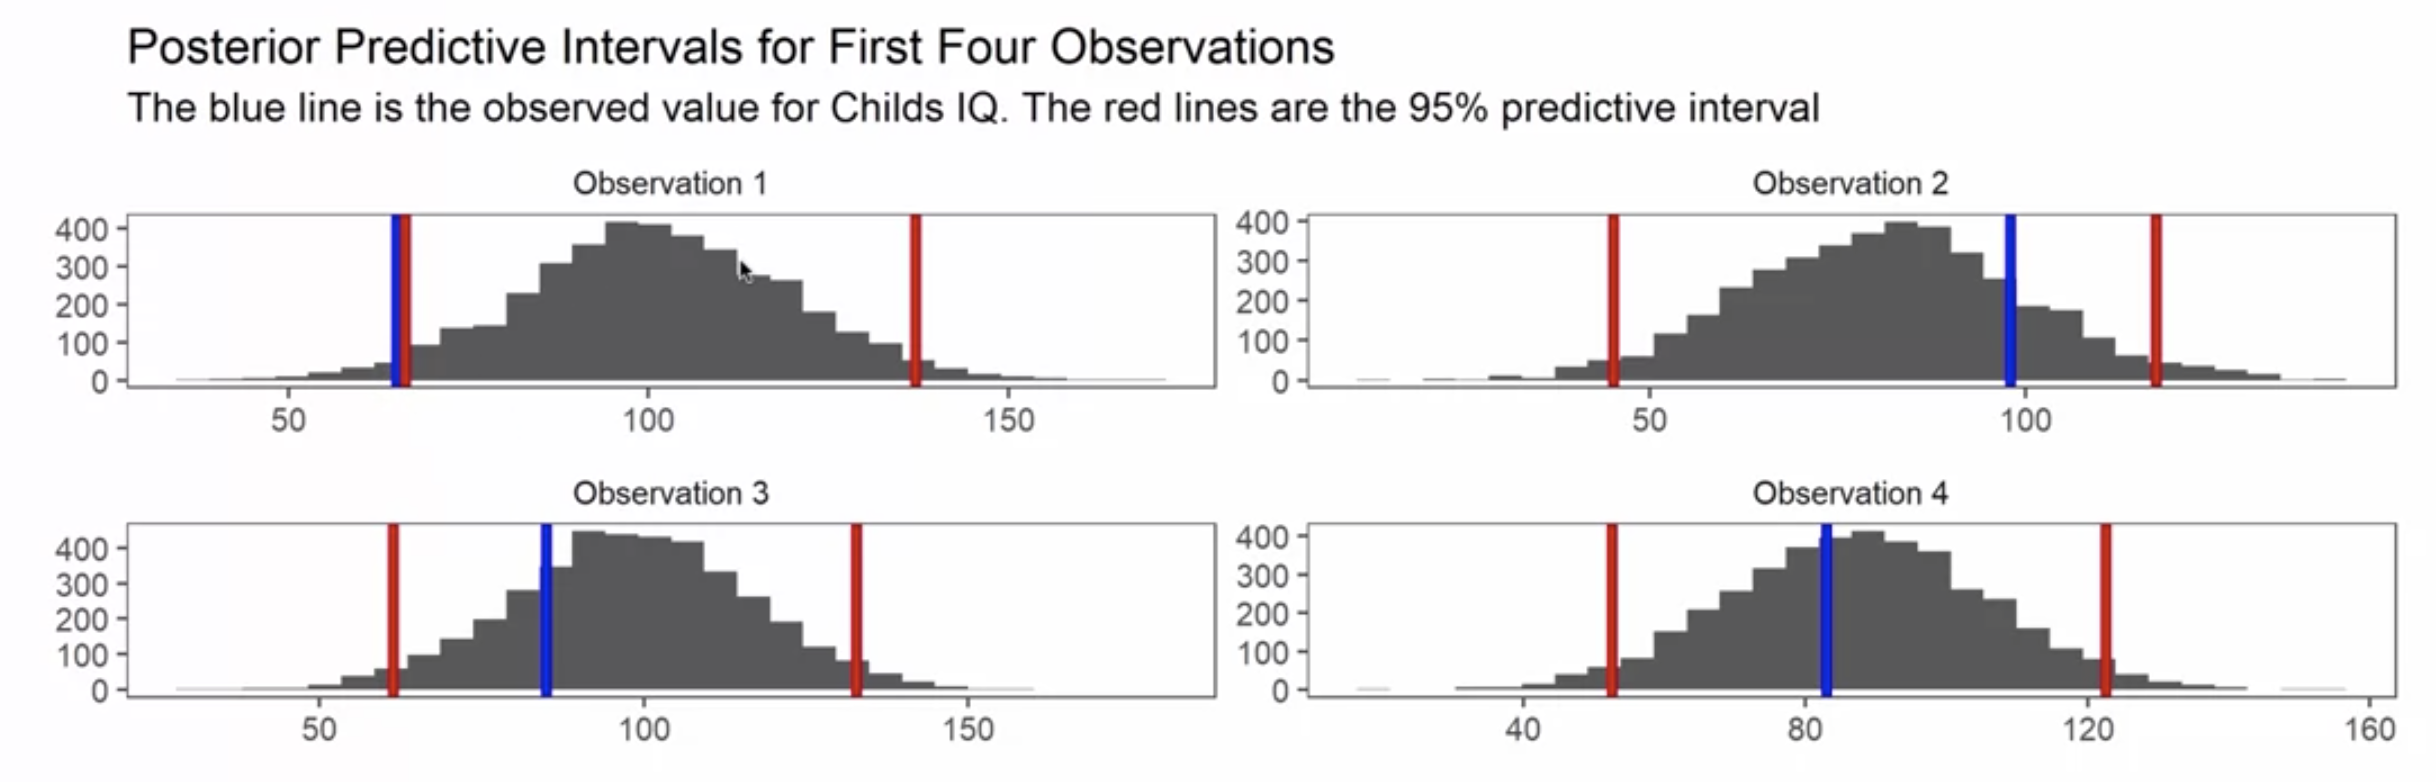

In [6]:
Image('images/bayesian_4.png', width=600)

Then, we can took the first observation and run the model. Whoops, as you can see, the blue line in the first graph is out of the confidence interval. Okay so, we can put it through the model again. And we do this over and over again.

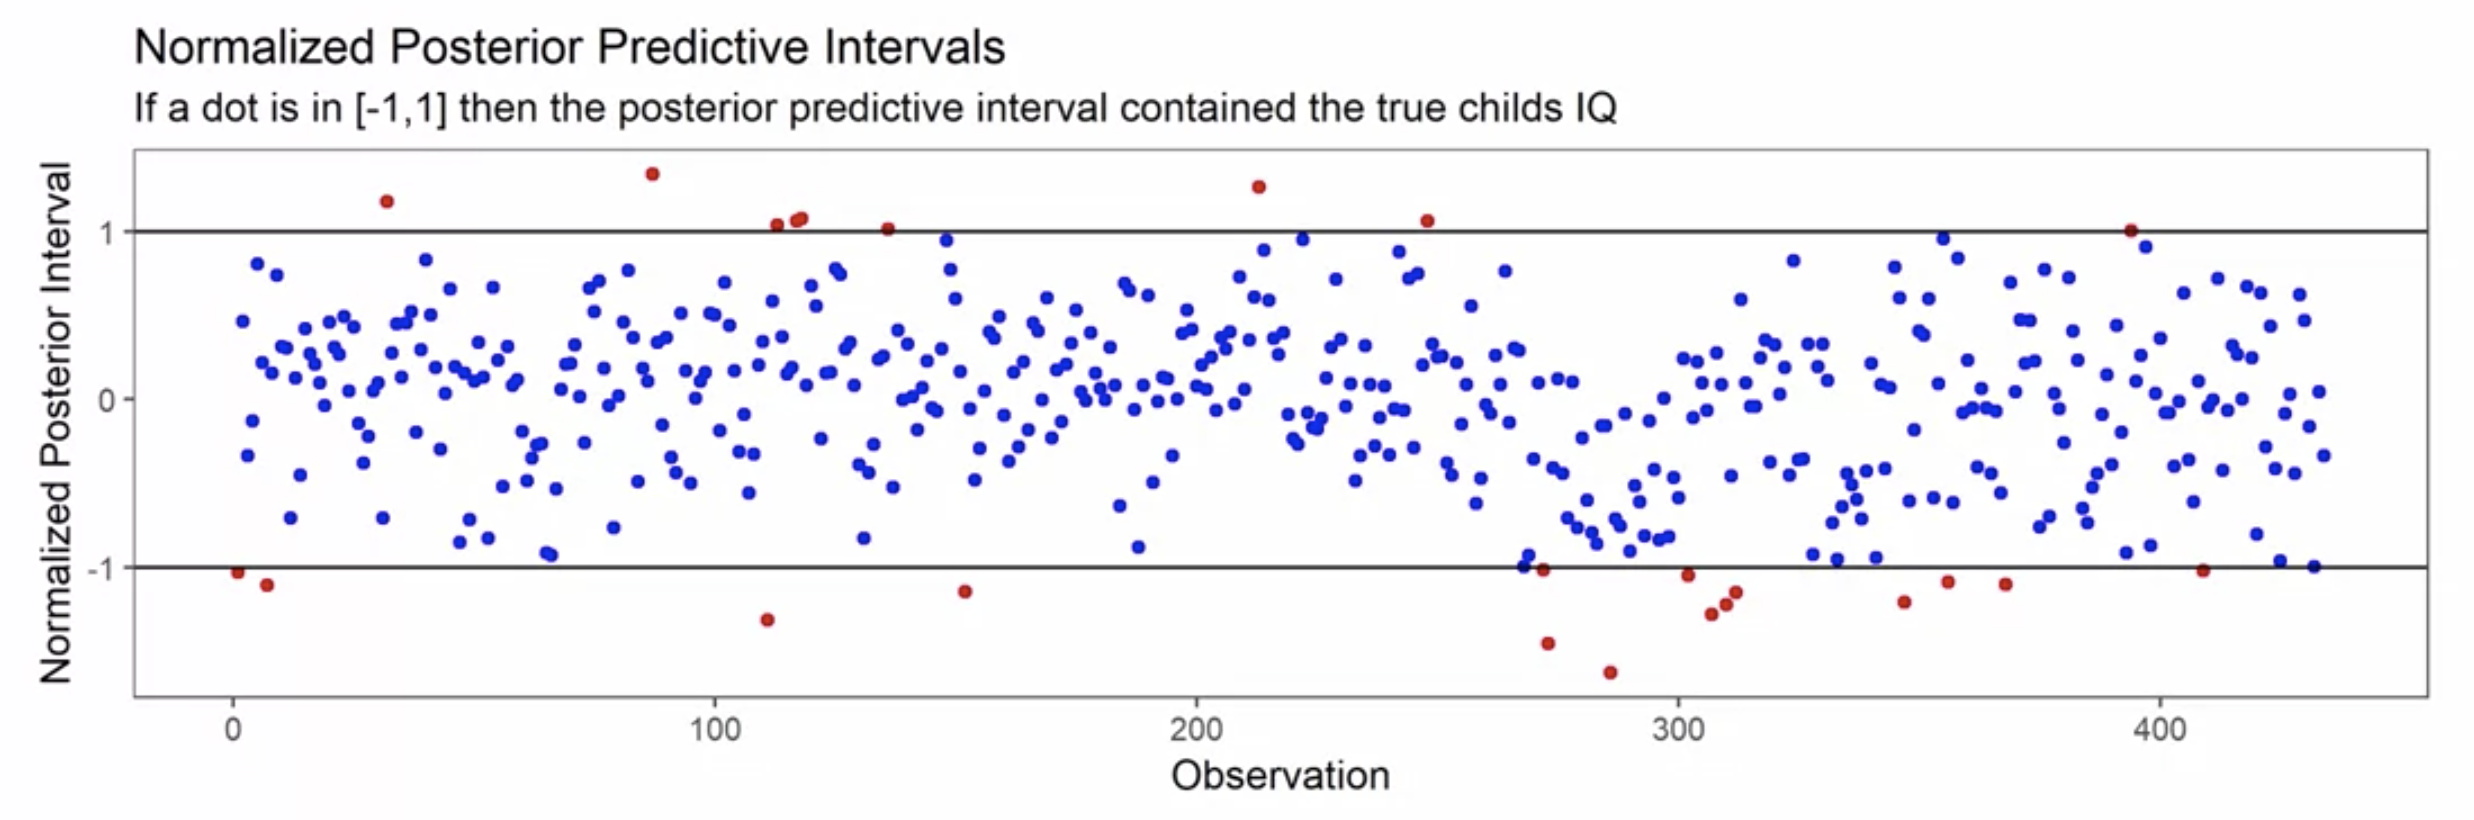

In [7]:
Image('images/bayesian_5.png', width=600)

When we repeat this for each set and represent these values between -1 and 1, we can see the graph above. The posterior interval, the 95% posterior interval, would have covered them. It would have made the correct prediction. All the points that are outside, all of these red points, these are all the points that the posterior interval would have missed.

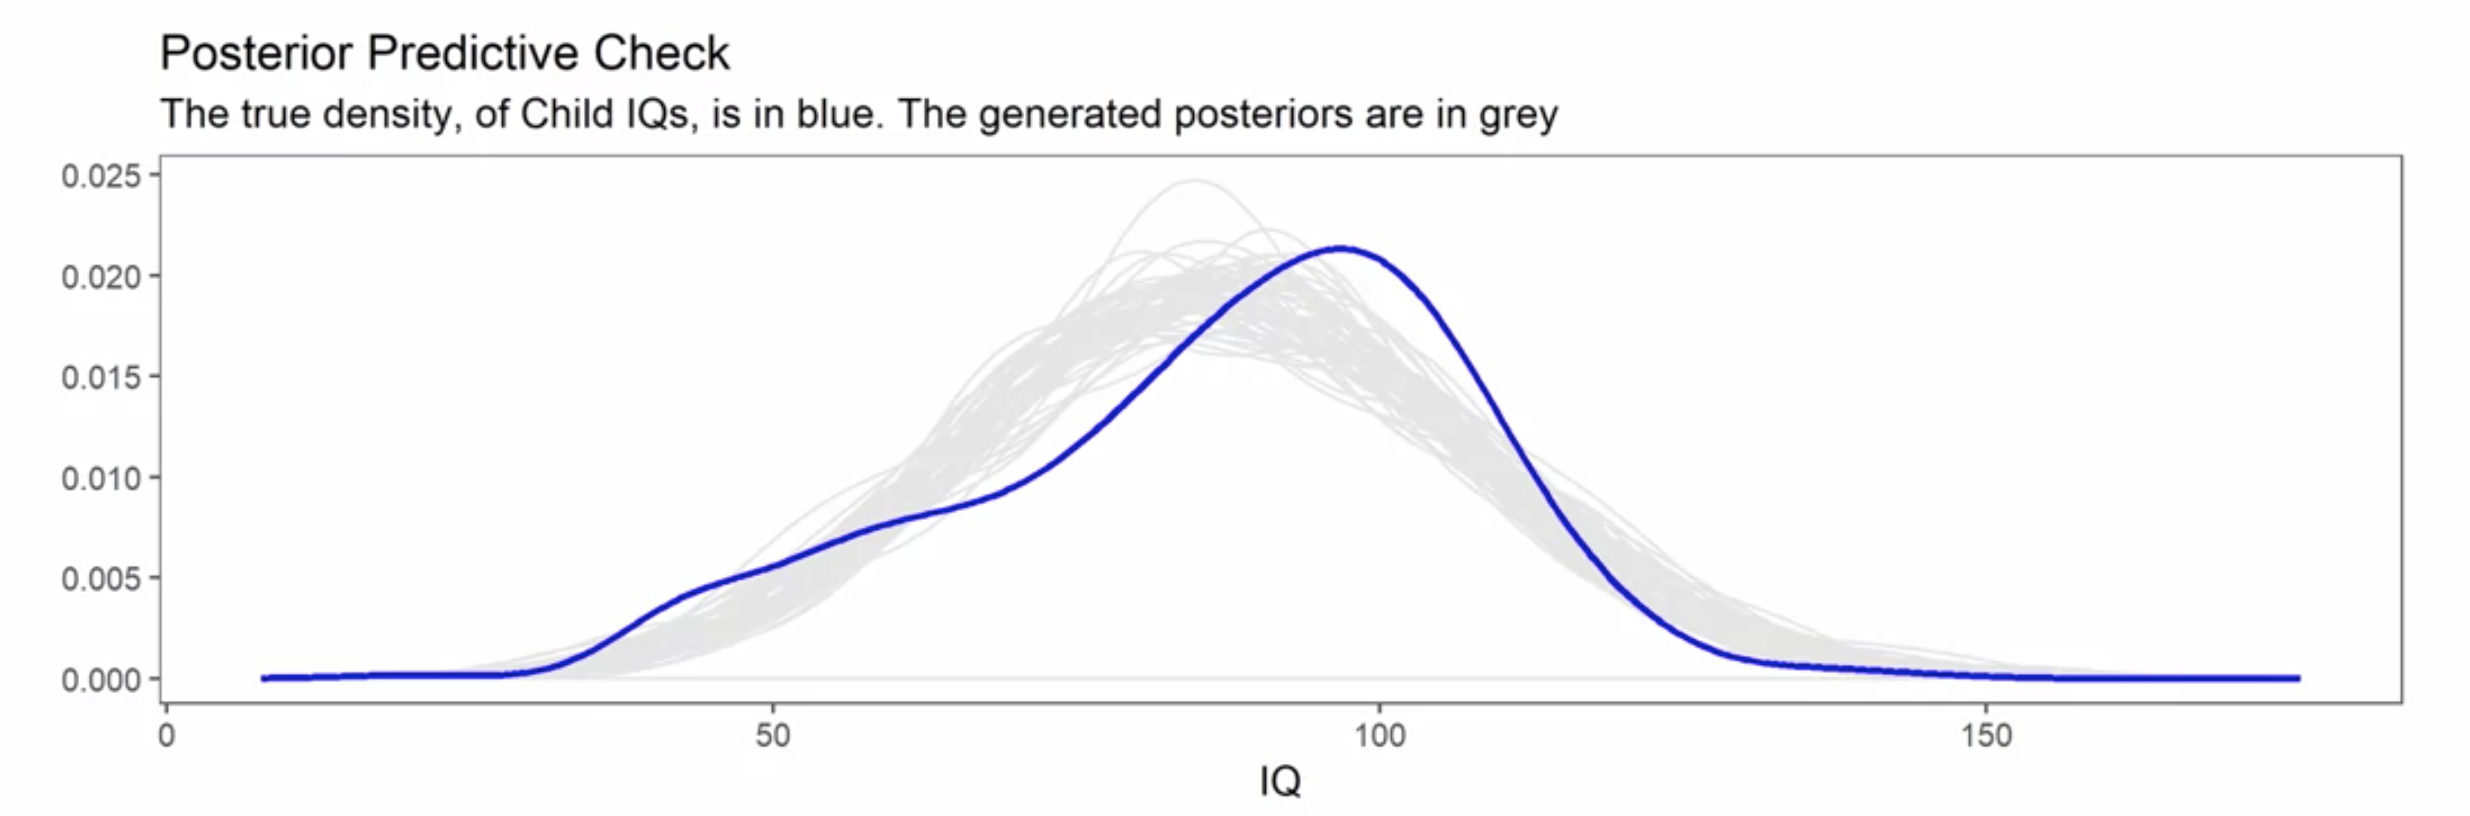

In [8]:
Image('images/bayesian_6.png', width=600)

So this is the distribution of the actual values in the dataset. Then for each of our predictive intervals, let's say that we made predictions on every single data point, and we plotted the density of that. So this could've been one of our sets of predictions, this could've been another set. And because we're using a Bayesian framework, these sets have variability. What this is telling us is this plot can tell us if we have systemic bias in either direction. And it can also tell us if the variance of our estimates are approximately correct. So we see that the width of this interval is roughly equal to the width of this interval.

The mean of all of our predictions looks to be perhaps a little bit off center from what the mean of this blue distribution is. Furthermore, we have this tail right here. And what this is saying is, this is saying we predict that very few people will have IQs. Maybe less than 50 or from this 50 to 70 range. But we predict a lot more will have maybe from 70 to 85 range. So we're overpredicting, sorry, we're underpredicting the amount here, but overpredicting the amount here. And because of this, this is telling me that my estimates may be biased. And furthermore, in general, our estimates may be pulled to the left, trying to account for this odd fat tail right here. Overall, all of our estimates are heading that way, and so this is something that we can pick up on. And just so we can get a better intuition of these plots, imagine that our predictions were perfect. Imagine that this was the plot of the data. If our predictions were perfect, we should see a bunch of lines that very closely follow the actual data, or close to perfect. So we should expect to see this, but instead we're seeing this.

The next step goes like this,

- We are going to allow all three parameters to vary according to whether a mother attended HS and their IQ group
    - For example, we will have a different $\beta_0$, $\beta_1$, and $\beta_2$ for mothers who are high IQ and attended HS, for those mothers that did not attend HS but also have a high IQ, etc.
- This model now has six sets of $\beta_0s$, $\beta_1s$, and $\beta_2s$
- We are also going to say that each of the $\beta_0s$ come from a common distribution. We'll also do the same with the $\beta_1s$ and the $\beta_2s$.

**CAUTION**: The lecture of this model is in the training videos, but I did not add it to the notes because it is very detailed.

#### Bayesian in Python

In this tutorial, we are going to go over basic bayesian analysis in python.  

##### Review

**Prior p(H):** Our prior reflects what we know about the value of some parameter before seeing data.  This could refer to previous trials and distributions.

**Likelihood p(D|H):** what is the plausibility that our data is observed, given our prior?

**Posterior p(H|D):** This is result of the Bayesian analysis and reflects all that we know about a problem (given our data and model).

**Evidence p(D):** Evidence is the probability of observing the data averaged over all the possible values the parameters can take. Also knowns as the noramlziing factor. The normalising constant makes sure that the resulting posterior distribution is a true probability distribution by ensuring that the sum of the distribution is equal to 1.

Because p(D) is considered a normalizing constant we can say: $p(H|D) \propto p(D|H) * p(H)$

##### Coin - Flipping Problem

Let's think of these terms in the context of a coin-flipping experiment.

On a standard coin, we have two sides, heads or tails.  Both of which are equally likely to show after a coin flip, or a 50% probability.

In the case of a coin-flipping trials, we may want to consider this probability our prior.

Let's go ahead and create our prior distribution:

In [9]:
coin_flips_prior = np.random.binomial(n=1, p=0.5, size=1000)
coin_flips_prior[:5]

array([0, 1, 0, 1, 0])

In [10]:
params = np.linspace(0, 1, 100)

In [11]:
p_prior = np.array(
    [
        np.product(st.bernoulli.pmf(coin_flips_prior, p)) 
        for p in params
    ]
)

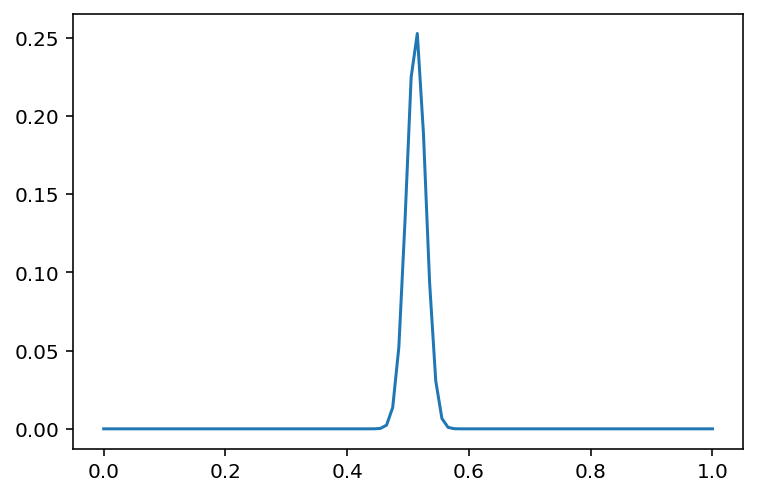

In [12]:
p_prior = p_prior / np.sum(p_prior)
plt.plot(params, p_prior);

As you can see, our prior distribution peaks at 0.5 which is what our probability for our fair coin is.

Now, let's introduce some observations from trials with an unfair coin.  Let's say the probability is now weight 80-20, where the probability a head is shown is 0.8.

Let's create this sampling distribution:

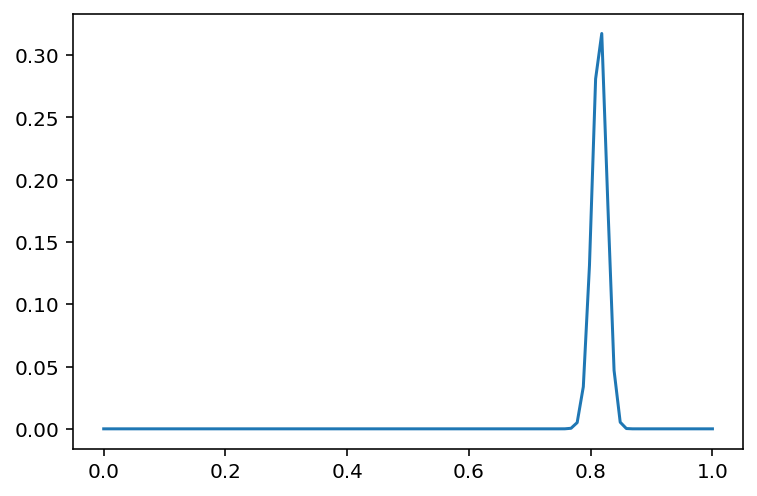

In [13]:
coin_flips_observed = np.random.binomial(n=1, p=0.8, size=1000)
p_observed = np.array(
    [
        np.product(st.bernoulli.pmf(coin_flips_observed, p)) 
        for p in params
    ]
)

p_observed = p_observed / np.sum(p_observed)
plt.plot(params, p_observed);

The peak for our sampling distribution is around 0.8.

While our observations from our sampling distribution indicate a probability around 0.8, because our prior is 0.5, we have to assess the likelihood that these values could be observed and find our posterior distribution.

Remember, $p(H|D) \propto p(D|H) * p(H)\ OR\ Posterior\ \propto Likelihood\ *  Prior$

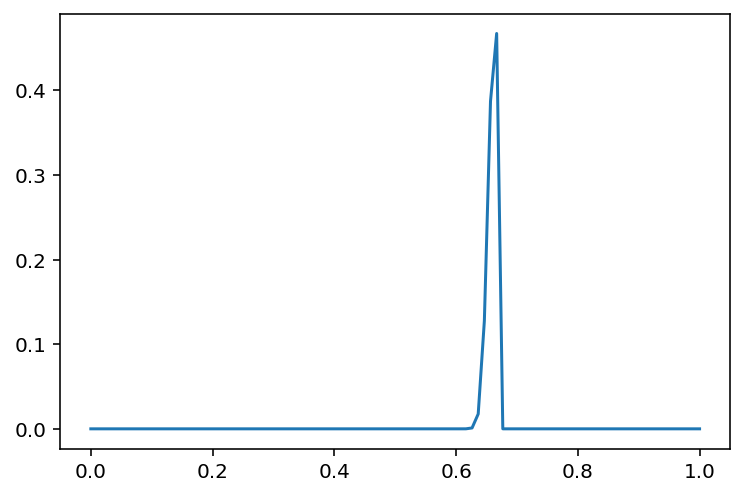

In [14]:
p_posterior = [p_prior[i] * p_observed[i] for i in range(len(p_prior))]
p_posterior = p_posterior / np.sum(p_posterior)
plt.plot(params, p_posterior);

##### University of Michigan Student IQs

We'll do another example where we have some prior belief about the IQ of University of Michigan students.

For our prior distribution, we'll have a normal distribution with a mean IQ of 100 and a standard deviation of 10.

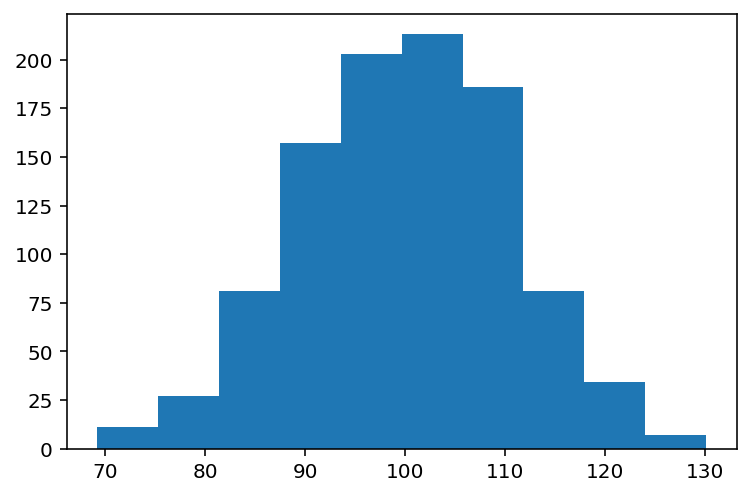

In [15]:
prior_distribution = np.random.normal(100, 10, 1000)
plt.hist(prior_distribution);

Now, let's say we are collecting some observations of student IQs which takes the shape of a normal distribution with mean 115 and standard deviation of 7.5 and want to construct our posterior distribution.

In order to do this, we update our prior by calculating the mean and variance after each observation.

The equations for our updated prior mean and variance are:

$$Updated\ Prior\ Mean = \frac{\sigma^2_{observed}\mu + \sigma_{prior}^2x}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

$$Updated\ Prior\ Variance = \frac{\sigma_{observed}^2\sigma_{prior}^2}{\sigma_{observed}^2 + \sigma_{prior}^2}$$

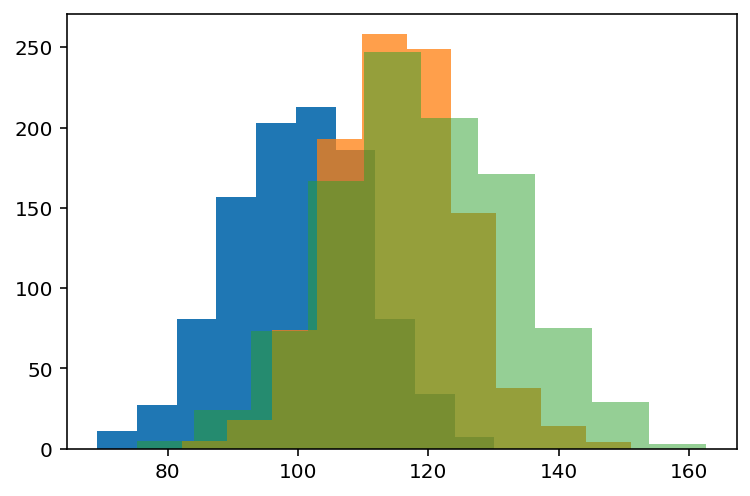

In [16]:
np.random.seed(5)
observed_distribution = np.random.normal(115, 10, 1000)
mu = [100] * 1000
sigma = [10] * 1000

# prior mean formula
mu[0] = (10 ** 2 * observed_distribution[0] + (10 ** 2) * 100) / (10 ** 2 + 10 ** 2)

# prior variance formula
sigma[0] = (10 ** 2 * 10 ** 2) / (10 ** 2 + 10 ** 2)

for i in range(1000):
    if i == 999:
        break
    
    # prior mean formula
    mu[i + 1] = (sigma[i] * observed_distribution[i + 1] + (10 ** 2) * mu[i]) / (sigma[i] + 10 ** 2)
    
    # prior variance formula
    sigma[i + 1] = (sigma[i] * 10 ** 2) / (sigma[i] + 10 ** 2)
    

posterior_distributions = [[]] * 20
    
for i in range(20):
    posterior_distributions[i] = np.random.normal(mu[i], sigma[i], 1000)
    
plt.hist(prior_distribution)
plt.hist(observed_distribution, alpha=0.75)
plt.hist(posterior_distributions[5], alpha=0.5);